## Import libraries

In [1]:
# import lib
import pandas as pd
import numpy as np
from facebook_scraper import get_posts
import datetime

## Scrape Facebook eateries post

In [17]:
# Facebook scraper 
list_of_eateries = ['primadeli', 'Polar.Puffs.Cakes', 'oldchangkee1956','MrBeanSingapore','yakunkayatoastsg','toastboxsingapore','breadtalksingapore','DominosSG','singaporecanadianpizza','JollibeeSG','coffeebean.sg','StarbucksSingapore','lihosg','eachacupsingapore','KFC.SG','LongJohnSilvers.Sg','SubwaySingapore','mosburgersg','BurgerKingSG','PizzaHutSingapore','fishandco.sg'] # just insert Facebook page name into list
list_of_post = []

for eatery in list_of_eateries:
    for post in get_posts(eatery, pages= 1): # pages = number of pages to scrape
        list_of_post.append(post)

print("Total number of post: ", len(list_of_post))

Total number of post:  42


In [18]:
# list_of_eateries = ['primadeli', 'Polar.Puffs.Cakes']
# list_of_post = []

# # append FB post into list_of_post
# for eatery in list_of_eateries:
#     for post in get_posts(eatery, pages=2):
#         list_of_post.append(post)

## Clean text data
* Only show post from last week
* Remove all empty rows
* Remove all emojis, punctuations, URL links and text formattings

In [19]:
# data cleaning
# convert time column from series to datetime
df = pd.DataFrame(list_of_post)
df['time'] = pd.to_datetime(df['time'])

In [20]:
today = datetime.datetime.now().date()
week_ago = today - datetime.timedelta(days=7) # date from a week ago
print("Date now: ",today)
print("Date week ago: ",week_ago)

Date now:  2021-03-16
Date week ago:  2021-03-09


In [21]:
delta = today - week_ago
date_range = []
for i in range(delta.days + 1):
    day = week_ago + datetime.timedelta(days=i)
    date_range.append(day)
print("Date that are considered: ",date_range)

Date that are considered:  [datetime.date(2021, 3, 9), datetime.date(2021, 3, 10), datetime.date(2021, 3, 11), datetime.date(2021, 3, 12), datetime.date(2021, 3, 13), datetime.date(2021, 3, 14), datetime.date(2021, 3, 15), datetime.date(2021, 3, 16)]


In [22]:
# drop dates not within 1 week
in_range = []
for date in df['time']:
    in_range.append(date in date_range)
in_range = np.array(in_range)
df = df[in_range]

In [23]:
# remove all blank post
df = df[df['text'] != ""]
print("number of empty rows: ", sum(df['text'] == ""))
df = df.reset_index(drop=True)

number of empty rows:  0


In [24]:
# remove all emoji, ignore warning
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# deEmojify every post
for i in range(len(df['text'])):
    df['text'][i] = deEmojify(df['text'][i])

<ipython-input-24-1c9add4ae39d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = deEmojify(df['text'][i])


In [25]:
# remove all links from post
count = 0
for message in df['text']:
    df['text'][count]= re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", message)
    count += 1

<ipython-input-25-54ad51445ed3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][count]= re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", message)


In [26]:
# remove all punctuations from post
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

stored_message = ""
count = 0
for message in df['text']:
    for letter in message:
        if letter not in punctuations:
            stored_message = stored_message + letter # store all non-punc alphanumeric in stored_message
    df['text'][count] = stored_message # input stored_message into corresponding post
    stored_message = ''
    count += 1

<ipython-input-26-0e321cf8a77e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][count] = stored_message # input stored_message into corresponding post


In [27]:
# remove all \n (new line formatting)
count = 0
for message in df['text']:
    df['text'][count] = message.replace('\n',' ')
    count += 1

<ipython-input-27-a7ac2f3de8bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][count] = message.replace('\n',' ')


In [28]:
# drop unncessary columns
df = df.drop(['post_id','shared_text','video_thumbnail','video_id','likes','comments','shares','user_id','images','post_text'],axis=1) 
df['label'] = ''
df['classif_text'] = ''

In [ ]:
## insert save to csv
df.to_csv(r'FB_post.csv', index = False)

## After labelling post as discount or not, import new CSV file

In [2]:
df1 = pd.read_csv('FB_post.csv')
df1 = df1.drop('Unnamed: 0',axis=1)
df1.head()

,text,label
0,The sweet buttery Magic Christmas House Cookie...,1
1,It time for a simple game of tictactoe with ou...,0
2,Have you ever wondered where Santa lived at as...,1
3,Our bestselling Truffle Yule Log returns to da...,0
4,Our Hazelnut Yule Log Cake is not to be missed...,1


In [ ]:
## Snowball stemming and stop word

In [3]:
# Convert all words to lowercases
for row in range(len(df1)):
    df1['text'][row] = df1['text'][row].lower()

<ipython-input-3-02268d185a7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'][row] = df1['text'][row].lower()


In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

for row in range(len(df1)):
    text_tokens = []
    text_tokens = word_tokenize(df1['text'][row])
    stem_words = [word for word in text_tokens if not word in stopwords.words()]
    filtered_sentence = (" ").join(stem_words)
    df1['text'][row] = filtered_sentence

<ipython-input-4-996cc78ea703>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'][row] = filtered_sentence


In [8]:
from nltk.stem.snowball import SnowballStemmer 
snow_stemmer = SnowballStemmer(language='english')

output = []
for sent, row in zip(df1['text'],range(len(df1))):
    df1['text'][row] = (" ".join([snow_stemmer.stem(i) for i in sent.split()]))

<ipython-input-8-60a06b8fe3ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'][row] = (" ".join([snow_stemmer.stem(i) for i in sent.split()]))


## Text classifier

In [11]:
from sklearn.model_selection import train_test_split

X = df1['text']
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer # Calcuate time elapsed in training model

def classif_report(name, model, threshold=0.5):
    prediction = model.predict_proba(X_test)
    # Classification Report
    prediction = np.where(prediction[:,1]>=threshold, 1, 0) 
    print("\u0332".join(name)+'\n')
    print(classification_report(y_test, prediction))

    # Confusion Matrix
    cf_matrix = confusion_matrix(y_test, prediction)
    group_names = ['True Pos','False Neg','False Pos','True Neg']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                cf_matrix.flatten()/np.sum(cf_matrix)]
    datalabels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                zip(group_names,group_counts,group_percentages)]
    datalabels = np.asarray(datalabels).reshape(2,2)
    axislabels = ['Discount', 'Not Discount']
    con_mat = sns.heatmap(cf_matrix, annot=datalabels, fmt='', cmap='Blues', annot_kws={"size": 13}, xticklabels= axislabels, yticklabels=axislabels)
    con_mat.set_xticklabels(con_mat.get_xmajorticklabels(), fontsize = 12, verticalalignment = 'center', horizontalalignment = 'center')
    con_mat.set_yticklabels(con_mat.get_ymajorticklabels(), fontsize = 12, verticalalignment = 'center', horizontalalignment = 'center', rotation=90)
    plt.xlabel("\nPredictions")
    plt.ylabel("Ground Truth\n") 
    plt.show()

In [13]:
from sklearn.metrics import roc_curve, precision_recall_curve

def RocCurve(model):
    sns.set_context('talk')
    prediction = model.predict(X_test)
    auc = roc_auc_score(y_test, prediction)
    
    fig, axList = plt.subplots(ncols=2)
    fig.set_size_inches(8, 4)
    # Get the probabilities for each of the two categories
    y_prob = model.predict_proba(X_test)

    # Plot the ROC-AUC curve
    ax = axList[0]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
    ax.plot(fpr, tpr, linewidth=5)
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title="ROC Curve\nAUC={}".format(round(auc,3)))
    ax.grid(True)
    
    # Plot the precision-recall curve
    ax = axList[1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
    ax.plot(recall, precision, linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='Precision-Recall curve')
    ax.grid(True)
    
    plt.tight_layout()
        
#     threshold_data = {'tpr-fpr':np.round(tpr-fpr,3), 'thresholds': np.round(thresholds,3)}
#     threshold_range = pd.DataFrame(threshold_data).drop(0,axis=0)
#     threshold_range = threshold_range.reset_index().drop(['index'],axis=1)
#     rate, optimal_threshold = threshold_range.iloc[threshold_range['tpr-fpr'].idxmax()]
#     print(threshold_range,'\n','Optimal threshold: ',optimal_threshold)

In [14]:
from sklearn.metrics import roc_curve, precision_recall_curve

def RocCurve_noproba(model):
    prediction = model.predict(X_test)
    auc = roc_auc_score(y_test, prediction)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(max_df = 0.50)),
                     ('clf', MultinomialNB()),
])

# Random Forest:
text_clf_rf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
])

# Gradient Boosted:
text_clf_gbc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', GradientBoostingClassifier()),
])

## Naive Bayes Classifier

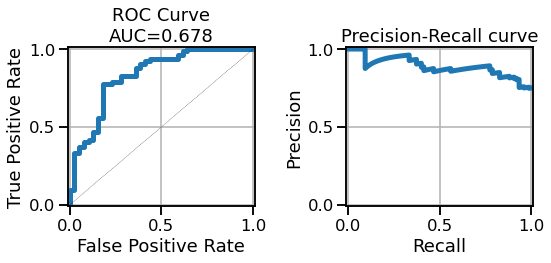

In [16]:
text_clf_nb.fit(X_train, y_train)
RocCurve(text_clf_nb)

N̲a̲i̲v̲e̲ ̲B̲a̲y̲e̲s

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        39
           1       0.82      0.91      0.86        75

    accuracy                           0.81       114
   macro avg       0.80      0.76      0.77       114
weighted avg       0.80      0.81      0.80       114



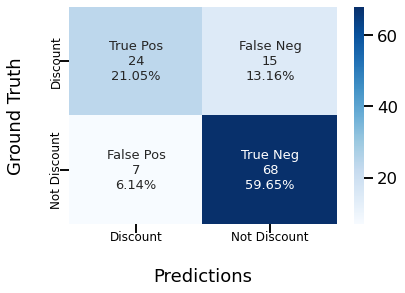

In [35]:
nb_threshold = 0.6
nb_pred = np.where(text_clf_nb.predict_proba(X_test)[:,1]>=nb_threshold, 1, 0)
classif_report('Naive Bayes', text_clf_nb, nb_threshold)

## Random Forest Model

In [18]:
text_clf_rf.fit(X_train, y_train) #Random Forest does not have a proba function as it is a decision tree
rf_pred = text_clf_rf.predict(X_test)

R̲a̲n̲d̲o̲m̲ ̲F̲o̲r̲e̲s̲t

              precision    recall  f1-score   support

           0       0.77      0.44      0.56        39
           1       0.76      0.93      0.84        75

    accuracy                           0.76       114
   macro avg       0.77      0.68      0.70       114
weighted avg       0.76      0.76      0.74       114



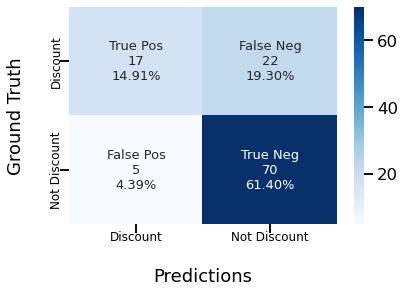

In [38]:
nb_threshold = 0.5
nb_pred = np.where(text_clf_rf.predict_proba(X_test)[:,1]>=nb_threshold, 1, 0)
classif_report('Random Forest', text_clf_rf, nb_threshold)

## Gradient Boosted Model

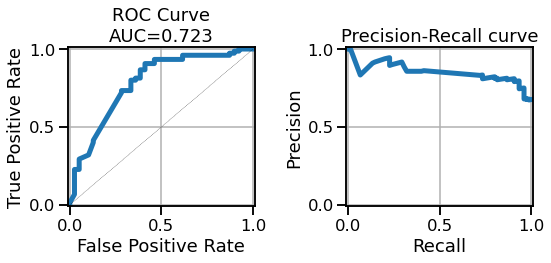

In [20]:
text_clf_gbc.fit(X_train, y_train)
RocCurve(text_clf_gbc)

G̲r̲a̲i̲d̲e̲n̲t̲ ̲B̲o̲o̲s̲t̲e̲d

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        39
           1       0.81      0.80      0.81        75

    accuracy                           0.75       114
   macro avg       0.72      0.72      0.72       114
weighted avg       0.75      0.75      0.75       114



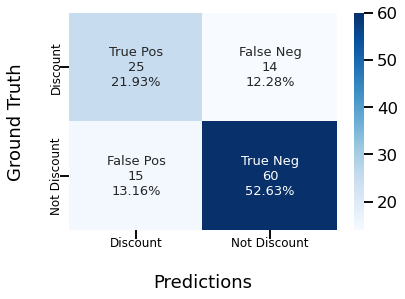

In [43]:
nb_threshold = 0.75
nb_pred = np.where(text_clf_gbc.predict_proba(X_test)[:,1]>=nb_threshold, 1, 0)
classif_report('Graident Boosted', text_clf_gbc, nb_threshold)

## Run models on new dataset

In [50]:
for row in range(len(df)):
    df['text_tfidf'][row] = df['text'][row].lower()

<ipython-input-50-afbedfb8da43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_tfidf'][row] = df['text'][row].lower()


In [51]:
# Form a prediction set
predictions = text_clf_nb.predict(df['text_tfidf'])
df['label'] = predictions

In [53]:
deals_list = df[~df['label'].isin(['Non'])]
deals_list = deals_list.drop(['label','classif_text'],axis=1)

In [54]:
deals_list.head()

,text,time,image,video,post_url,link,text_tfidf
0,Delicious mini tartlets topped with fresh frui...,2021-03-13 10:00:01,https://scontent.fsin9-2.fna.fbcdn.net/v/t1.0-...,None,https://facebook.com/story.php?story_fbid=3955...,None,delicious mini tartlets topped with fresh frui...
1,Nothing beats the joy of sinking your teeth in...,2021-03-11 18:00:01,https://scontent.fsin9-2.fna.fbcdn.net/v/t1.0-...,None,https://facebook.com/story.php?story_fbid=3951...,None,nothing beats the joy of sinking your teeth in...
2,Last 3 days to join our giveaway with goldhear...,2021-03-09 18:00:02,None,https://video.fsin9-1.fna.fbcdn.net/v/t42.1790...,https://facebook.com/watch?v=2618986585058927,None,last 3 days to join our giveaway with goldhear...
3,HAPPY NATIONAL POTATO CHIPS DAY Get our speci...,2021-03-14 10:59:15,https://scontent.fsin9-1.fna.fbcdn.net/v/t1.0-...,None,https://facebook.com/story.php?story_fbid=4048...,None,happy national potato chips day get our speci...
4,In support of SG Cares Givingsg we are spread...,2021-03-12 10:00:00,https://scontent.fsin9-2.fna.fbcdn.net/v/t1.0-...,None,https://facebook.com/story.php?story_fbid=2423...,http://www.go.gov.sg/sgcaresapple,in support of sg cares givingsg we are spread...


In [33]:
# export predictions and post to excel 
deals_list.to_excel("deals_list.xlsx")  

In [60]:
# # import best model from classif_model.ipynb
# import pickle

# filename = 'deals_classif.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [61]:
# # predictions of model
# predictions= loaded_model.predict(df['text'])
# df['label'] = predictions